In [1]:
!pwd

/Users/hamiddimyati/Documents/codes/II2202_Stacking-Regression-Comparative-Study/notebooks


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import re
from bs4 import BeautifulSoup
from urllib.request import Request,urlopen

In [3]:
dir = "/Users/hamiddimyati/Documents/codes/II2202_Stacking-Regression-Comparative-Study"

# EDA Communities & Crime Data

In [11]:
soup_link = BeautifulSoup(urlopen('http://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.names'))
table_header = soup_link.find('p')

In [37]:
p = re.compile(r'@attribute\s+((?:\w+(?:|$)){1})')
columns = p.findall(table_header.text)

In [38]:
columns

['state',
 'county',
 'community',
 'communityname',
 'fold',
 'population',
 'householdsize',
 'racepctblack',
 'racePctWhite',
 'racePctAsian',
 'racePctHisp',
 'agePct12t21',
 'agePct12t29',
 'agePct16t24',
 'agePct65up',
 'numbUrban',
 'pctUrban',
 'medIncome',
 'pctWWage',
 'pctWFarmSelf',
 'pctWInvInc',
 'pctWSocSec',
 'pctWPubAsst',
 'pctWRetire',
 'medFamInc',
 'perCapInc',
 'whitePerCap',
 'blackPerCap',
 'indianPerCap',
 'AsianPerCap',
 'OtherPerCap',
 'HispPerCap',
 'NumUnderPov',
 'PctPopUnderPov',
 'PctLess9thGrade',
 'PctNotHSGrad',
 'PctBSorMore',
 'PctUnemployed',
 'PctEmploy',
 'PctEmplManu',
 'PctEmplProfServ',
 'PctOccupManu',
 'PctOccupMgmtProf',
 'MalePctDivorce',
 'MalePctNevMarr',
 'FemalePctDiv',
 'TotalPctDiv',
 'PersPerFam',
 'PctFam2Par',
 'PctKids2Par',
 'PctYoungKids2Par',
 'PctTeen2Par',
 'PctWorkMomYoungKids',
 'PctWorkMom',
 'NumIlleg',
 'PctIlleg',
 'NumImmig',
 'PctImmigRecent',
 'PctImmigRec5',
 'PctImmigRec8',
 'PctImmigRec10',
 'PctRecentImmig',
 'P

In [39]:
comm_crime = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.data', sep=',', header=None, names=columns)

In [40]:
comm_crime

state county community        communityname  fold  population  \
0         8      ?         ?         Lakewoodcity     1        0.19   
1        53      ?         ?          Tukwilacity     1        0.00   
2        24      ?         ?         Aberdeentown     1        0.00   
3        34      5     81440  Willingborotownship     1        0.04   
4        42     95      6096    Bethlehemtownship     1        0.01   
...     ...    ...       ...                  ...   ...         ...   
1989     12      ?         ?    TempleTerracecity    10        0.01   
1990      6      ?         ?          Seasidecity    10        0.05   
1991      9      9     80070        Waterburytown    10        0.16   
1992     25     17     72600          Walthamcity    10        0.08   
1993      6      ?         ?          Ontariocity    10        0.20   

      householdsize  racepctblack  racePctWhite  racePctAsian  ...  LandArea  \
0              0.33          0.02          0.90          0.12  ...      0.12   
1              0.16          0.12          0.74          0.45  ...      0.02   
2              0.42          0.49          0.56          0.17  ...      0.01   
3              0.77          1.00          0.08          0.12  ...      0.02   
4              0.55          0.02          0.95          0.09  ...      0.04   
...             ...           ...           ...           ...  ...       ...   
1989           0.40          0.10          0.87          0.12  ...      0.01   
1990           0.96          0.46          0.28          0.83  ...      0.02   
1991           0.37          0.25          0.69          0.04  ...      0.08   
1992           0.51          0.06          0.87          0.22  ...      0.03   
1993           0.78          0.14          0.46          0.24  ...      0.11   

      PopDens  PctUsePubTrans  PolicCars  PolicOperBudg  LemasPctPolicOnPatr  \
0        0.26            0.20       0.06           0.04                  0.9   
1        0.12            0.45          ?              ?                    ?   
2        0.21            0.02          ?              ?                    ?   
3        0.39            0.28          ?              ?                    ?   
4        0.09            0.02          ?              ?                    ?   
...       ...             ...        ...            ...                  ...   
1989     0.28            0.05          ?              ?                    ?   
1990     0.37            0.20          ?              ?                    ?   
1991     0.32            0.18       0.08           0.06                 0.78   
1992     0.38            0.33       0.02           0.02                 0.79   
1993     0.30            0.05       0.08           0.04                 0.73   

      LemasGangUnitDeploy  LemasPctOfficDrugUn  PolicBudgPerPop  \
0                     0.5                 0.32             0.14   
1                       ?                 0.00                ?   
2                       ?                 0.00                ?   
3                       ?                 0.00                ?   
4                       ?                 0.00                ?   
...                   ...                  ...              ...   
1989                    ?                 0.00                ?   
1990                    ?                 0.00                ?   
1991                    0                 0.91             0.28   
1992                    0                 0.22             0.18   
1993                  0.5                 1.00             0.13   

      ViolentCrimesPerPop  
0                    0.20  
1                    0.67  
2                    0.43  
3                    0.12  
4                    0.03  
...                   ...  
1989                 0.09  
1990                 0.45  
1991                 0.23  
1992                 0.19  
1993                 0.48  

[1994 rows x 128 columns]

In [50]:
comm_crime = comm_crime.replace('?', np.nan)

In [59]:
total_missing = comm_crime.isnull().mean() * 100
total_missing[total_missing >= 0.5].sort_values()

county                  58.876630
community               59.027081
LemasPctPolicOnPatr     84.002006
PolicOperBudg           84.002006
PolicCars               84.002006
PolicAveOTWorked        84.002006
NumKindsDrugsSeiz       84.002006
OfficAssgnDrugUnits     84.002006
PctPolicMinor           84.002006
PctPolicAsian           84.002006
PctPolicHisp            84.002006
PctPolicBlack           84.002006
PctPolicWhite           84.002006
RacialMatchCommPol      84.002006
PolicPerPop             84.002006
PolicReqPerOffic        84.002006
LemasTotReqPerPop       84.002006
LemasTotalReq           84.002006
LemasSwFTFieldPerPop    84.002006
LemasSwFTFieldOps       84.002006
LemasSwFTPerPop         84.002006
LemasSwornFT            84.002006
LemasGangUnitDeploy     84.002006
PolicBudgPerPop         84.002006
dtype: float64

In [64]:
drop_cols = total_missing[total_missing >= 0.5].index.to_list()

In [65]:
comm_crime.drop(columns=drop_cols, inplace=True)

In [71]:
comm_crime.describe(include='object')

communityname OtherPerCap
count               1994        1993
unique              1828          97
top     Jacksonvillecity           0
freq                   5         129

In [73]:
comm_crime['OtherPerCap'] = comm_crime['OtherPerCap'].astype(float).round(2)

In [75]:
comm_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Columns: 104 entries, state to ViolentCrimesPerPop
dtypes: float64(101), int64(2), object(1)
memory usage: 1.6+ MB


In [77]:
(comm_crime.isnull().mean() * 100).sort_values()

state                  0.00000
PctHousOccup           0.00000
HousVacant             0.00000
MedNumBR               0.00000
PctHousLess3BR         0.00000
                        ...   
HispPerCap             0.00000
AsianPerCap            0.00000
LemasPctOfficDrugUn    0.00000
ViolentCrimesPerPop    0.00000
OtherPerCap            0.05015
Length: 104, dtype: float64

### Univariate Analysis

#### Dependent Variable

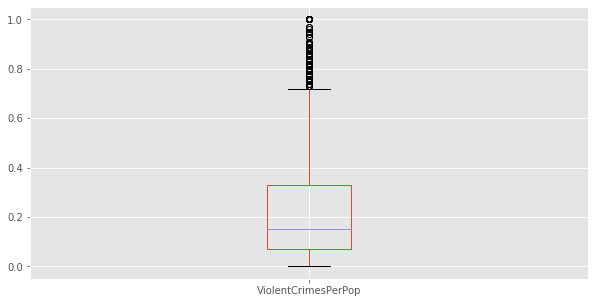

In [44]:
comm_crime['ViolentCrimesPerPop'].plot.box(figsize=(10,5))

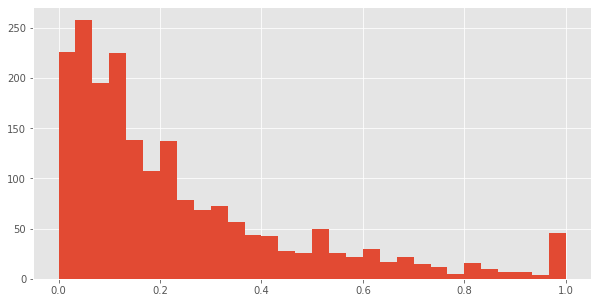

In [45]:
comm_crime['ViolentCrimesPerPop'].hist(bins=30, figsize=(10,5))

#### Independent Variable

In [47]:
comm_crime.groupby('communityname')['communityname'].agg('count')

communityname
Aberdeencity        2
Aberdeentown        1
Aberdeentownship    1
Adacity             1
AgouraHillscity     1
                   ..
Youngstowncity      1
YubaCitycity        1
Yucaipacity         1
Yukoncity           1
Zanesvillecity      1
Name: communityname, Length: 1828, dtype: int64

In [74]:
comm_crime.describe()

state         fold   population  householdsize  racepctblack  \
count  1994.000000  1994.000000  1994.000000    1994.000000   1994.000000   
mean     28.683551     5.493982     0.057593       0.463395      0.179629   
std      16.397553     2.873694     0.126906       0.163717      0.253442   
min       1.000000     1.000000     0.000000       0.000000      0.000000   
25%      12.000000     3.000000     0.010000       0.350000      0.020000   
50%      34.000000     5.000000     0.020000       0.440000      0.060000   
75%      42.000000     8.000000     0.050000       0.540000      0.230000   
max      56.000000    10.000000     1.000000       1.000000      1.000000   

       racePctWhite  racePctAsian  racePctHisp  agePct12t21  agePct12t29  ...  \
count   1994.000000   1994.000000  1994.000000  1994.000000  1994.000000  ...   
mean       0.753716      0.153681     0.144022     0.424218     0.493867  ...   
std        0.244039      0.208877     0.232492     0.155196     0.143564  ...   
min        0.000000      0.000000     0.000000     0.000000     0.000000  ...   
25%        0.630000      0.040000     0.010000     0.340000     0.410000  ...   
50%        0.850000      0.070000     0.040000     0.400000     0.480000  ...   
75%        0.940000      0.170000     0.160000     0.470000     0.540000  ...   
max        1.000000      1.000000     1.000000     1.000000     1.000000  ...   

       PctForeignBorn  PctBornSameState  PctSameHouse85  PctSameCity85  \
count     1994.000000       1994.000000     1994.000000    1994.000000   
mean         0.215552          0.608892        0.535050       0.626424   
std          0.231134          0.204329        0.181352       0.200521   
min          0.000000          0.000000        0.000000       0.000000   
25%          0.060000          0.470000        0.420000       0.520000   
50%          0.130000          0.630000        0.540000       0.670000   
75%          0.280000          0.777500        0.660000       0.770000   
max          1.000000          1.000000        1.000000       1.000000   

       PctSameState85     LandArea      PopDens  PctUsePubTrans  \
count     1994.000000  1994.000000  1994.000000     1994.000000   
mean         0.651530     0.065231     0.232854        0.161685   
std          0.198221     0.109459     0.203092        0.229055   
min          0.000000     0.000000     0.000000        0.000000   
25%          0.560000     0.020000     0.100000        0.020000   
50%          0.700000     0.040000     0.170000        0.070000   
75%          0.790000     0.070000     0.280000        0.190000   
max          1.000000     1.000000     1.000000        1.000000   

       LemasPctOfficDrugUn  ViolentCrimesPerPop  
count          1994.000000          1994.000000  
mean              0.094052             0.237979  
std               0.240328             0.232985  
min               0.000000             0.000000  
25%               0.000000             0.070000  
50%               0.000000             0.150000  
75%               0.000000             0.330000  
max               1.000000             1.000000  

[8 rows x 103 columns]

In [80]:
print(comm_crime.columns.tolist())

['state', 'communityname', 'fold', 'population', 'householdsize', 'racepctblack', 'racePctWhite', 'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29', 'agePct16t24', 'agePct65up', 'numbUrban', 'pctUrban', 'medIncome', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'medFamInc', 'perCapInc', 'whitePerCap', 'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'NumUnderPov', 'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'PctUnemployed', 'PctEmploy', 'PctEmplManu', 'PctEmplProfServ', 'PctOccupManu', 'PctOccupMgmtProf', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'TotalPctDiv', 'PersPerFam', 'PctFam2Par', 'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMomYoungKids', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRecent', 'PctImmigRec5', 'PctImmigRec8', 'PctImmigRec10', 'PctRecentImmig', 'PctRecImmig5', 'PctRecImmig8', 'PctRecImmig10', 'PctSpeakEnglOnly', 'PctNotSpeakEnglWe

Text(0.5, 1.0, 'OtherPerCap')

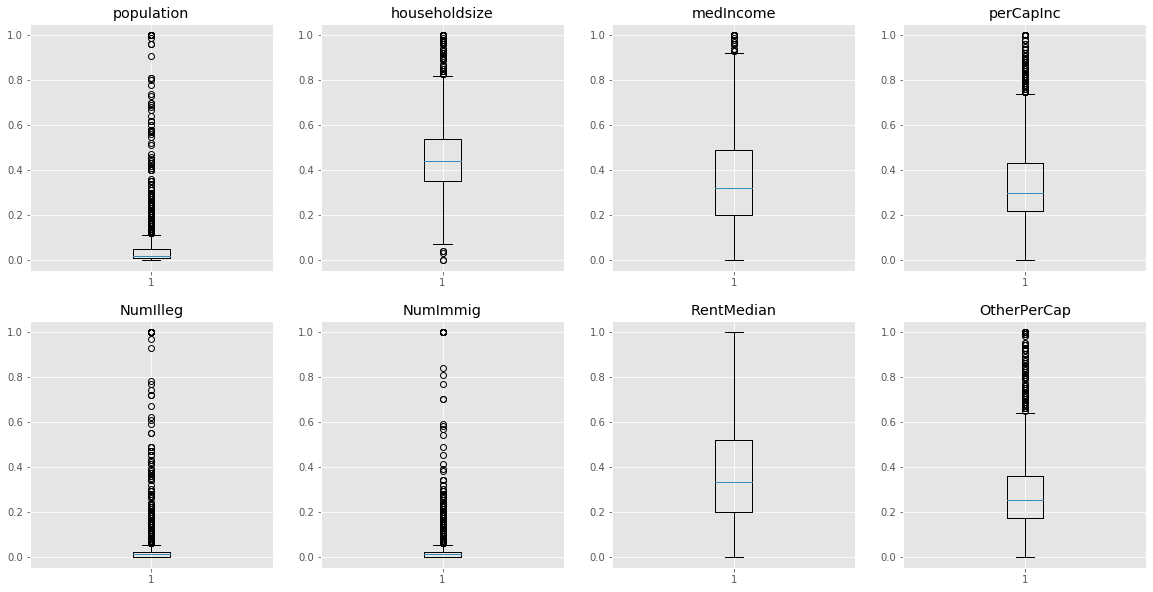

In [97]:
fig, ax = plt.subplots(2, 4, figsize=(20,10))
ax[0,0].boxplot(comm_crime['population'])
ax[0,0].set_title('population')
ax[0,1].boxplot(comm_crime['householdsize'])
ax[0,1].set_title('householdsize')
ax[0,2].boxplot(comm_crime['medIncome'])
ax[0,2].set_title('medIncome')
ax[0,3].boxplot(comm_crime['perCapInc'])
ax[0,3].set_title('perCapInc')
ax[1,0].boxplot(comm_crime['NumIlleg'])
ax[1,0].set_title('NumIlleg')
ax[1,1].boxplot(comm_crime['NumImmig'])
ax[1,1].set_title('NumImmig')
ax[1,2].boxplot(comm_crime['RentMedian'])
ax[1,2].set_title('RentMedian')
ax[1,3].boxplot(comm_crime.loc[comm_crime['OtherPerCap'].notna(), 'OtherPerCap'])
ax[1,3].set_title('OtherPerCap')

Text(0.5, 1.0, 'OtherPerCap')

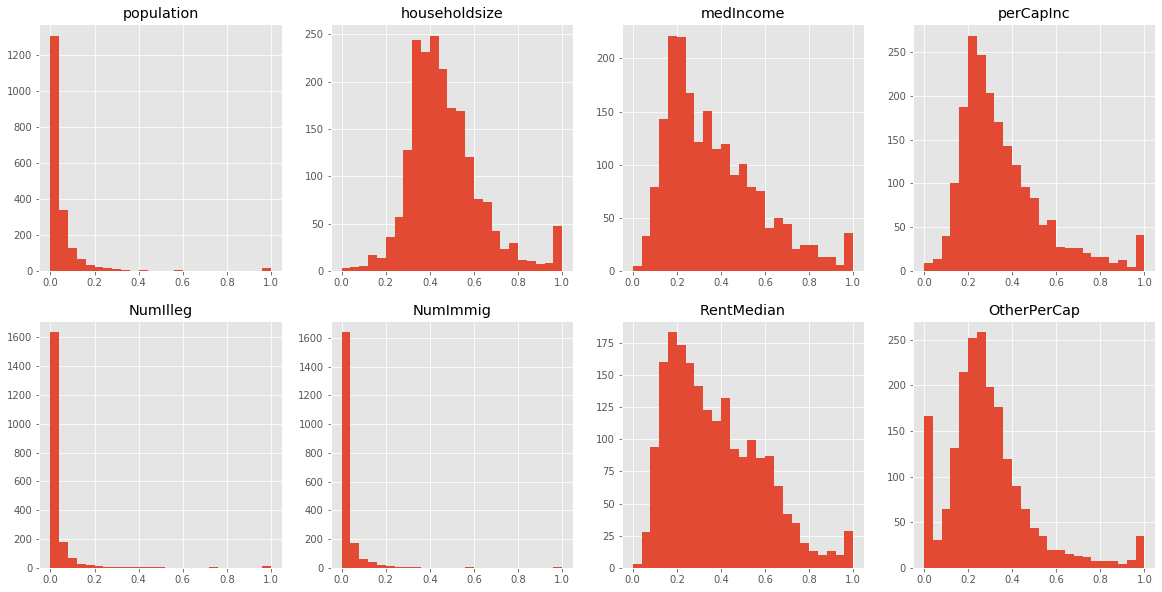

In [98]:
fig, ax = plt.subplots(2, 4, figsize=(20,10))
ax[0,0].hist(comm_crime['population'], bins=25)
ax[0,0].set_title('population')
ax[0,1].hist(comm_crime['householdsize'], bins=25)
ax[0,1].set_title('householdsize')
ax[0,2].hist(comm_crime['medIncome'], bins=25)
ax[0,2].set_title('medIncome')
ax[0,3].hist(comm_crime['perCapInc'], bins=25)
ax[0,3].set_title('perCapInc')
ax[1,0].hist(comm_crime['NumIlleg'], bins=25)
ax[1,0].set_title('NumIlleg')
ax[1,1].hist(comm_crime['NumImmig'], bins=25)
ax[1,1].set_title('NumImmig')
ax[1,2].hist(comm_crime['RentMedian'], bins=25)
ax[1,2].set_title('RentMedian')
ax[1,3].hist(comm_crime.loc[comm_crime['OtherPerCap'].notna(), 'OtherPerCap'], bins=25)
ax[1,3].set_title('OtherPerCap')

In [101]:
comm_crime = comm_crime.fillna(comm_crime.median())

### Bivariate Analysis

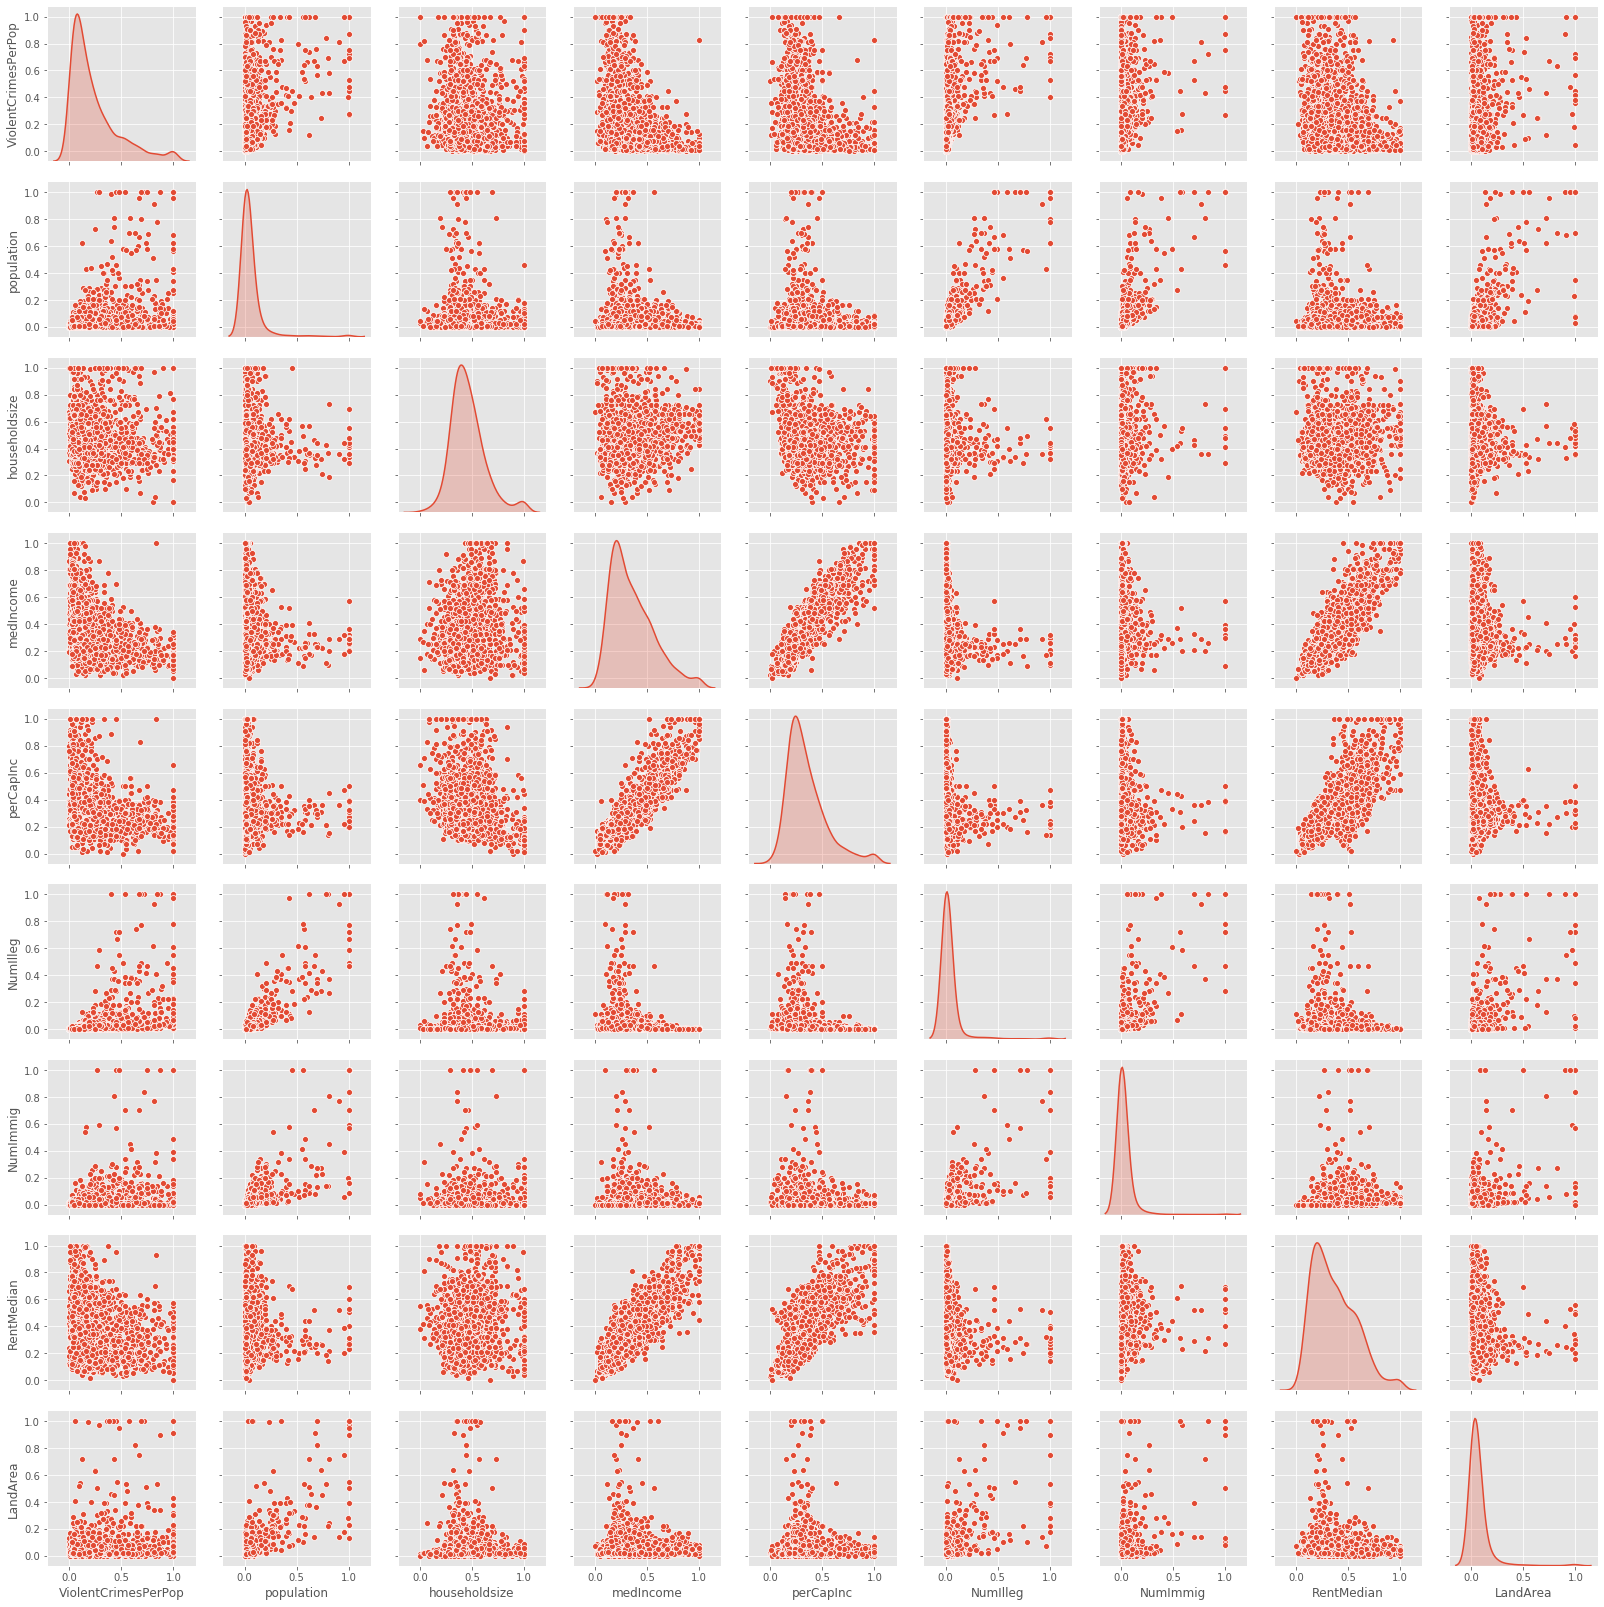

In [84]:
cols = ['ViolentCrimesPerPop','population', 'householdsize', 'medIncome', 'perCapInc', 'NumIlleg', 'NumImmig', 'RentMedian', 'LandArea']
sns.pairplot(comm_crime[cols], diag_kind="kde", diag_kws=dict(shade=True, bw=.05, vertical=False))

In [220]:
X = comm_crime.loc[:,comm_crime.dtypes!=object]

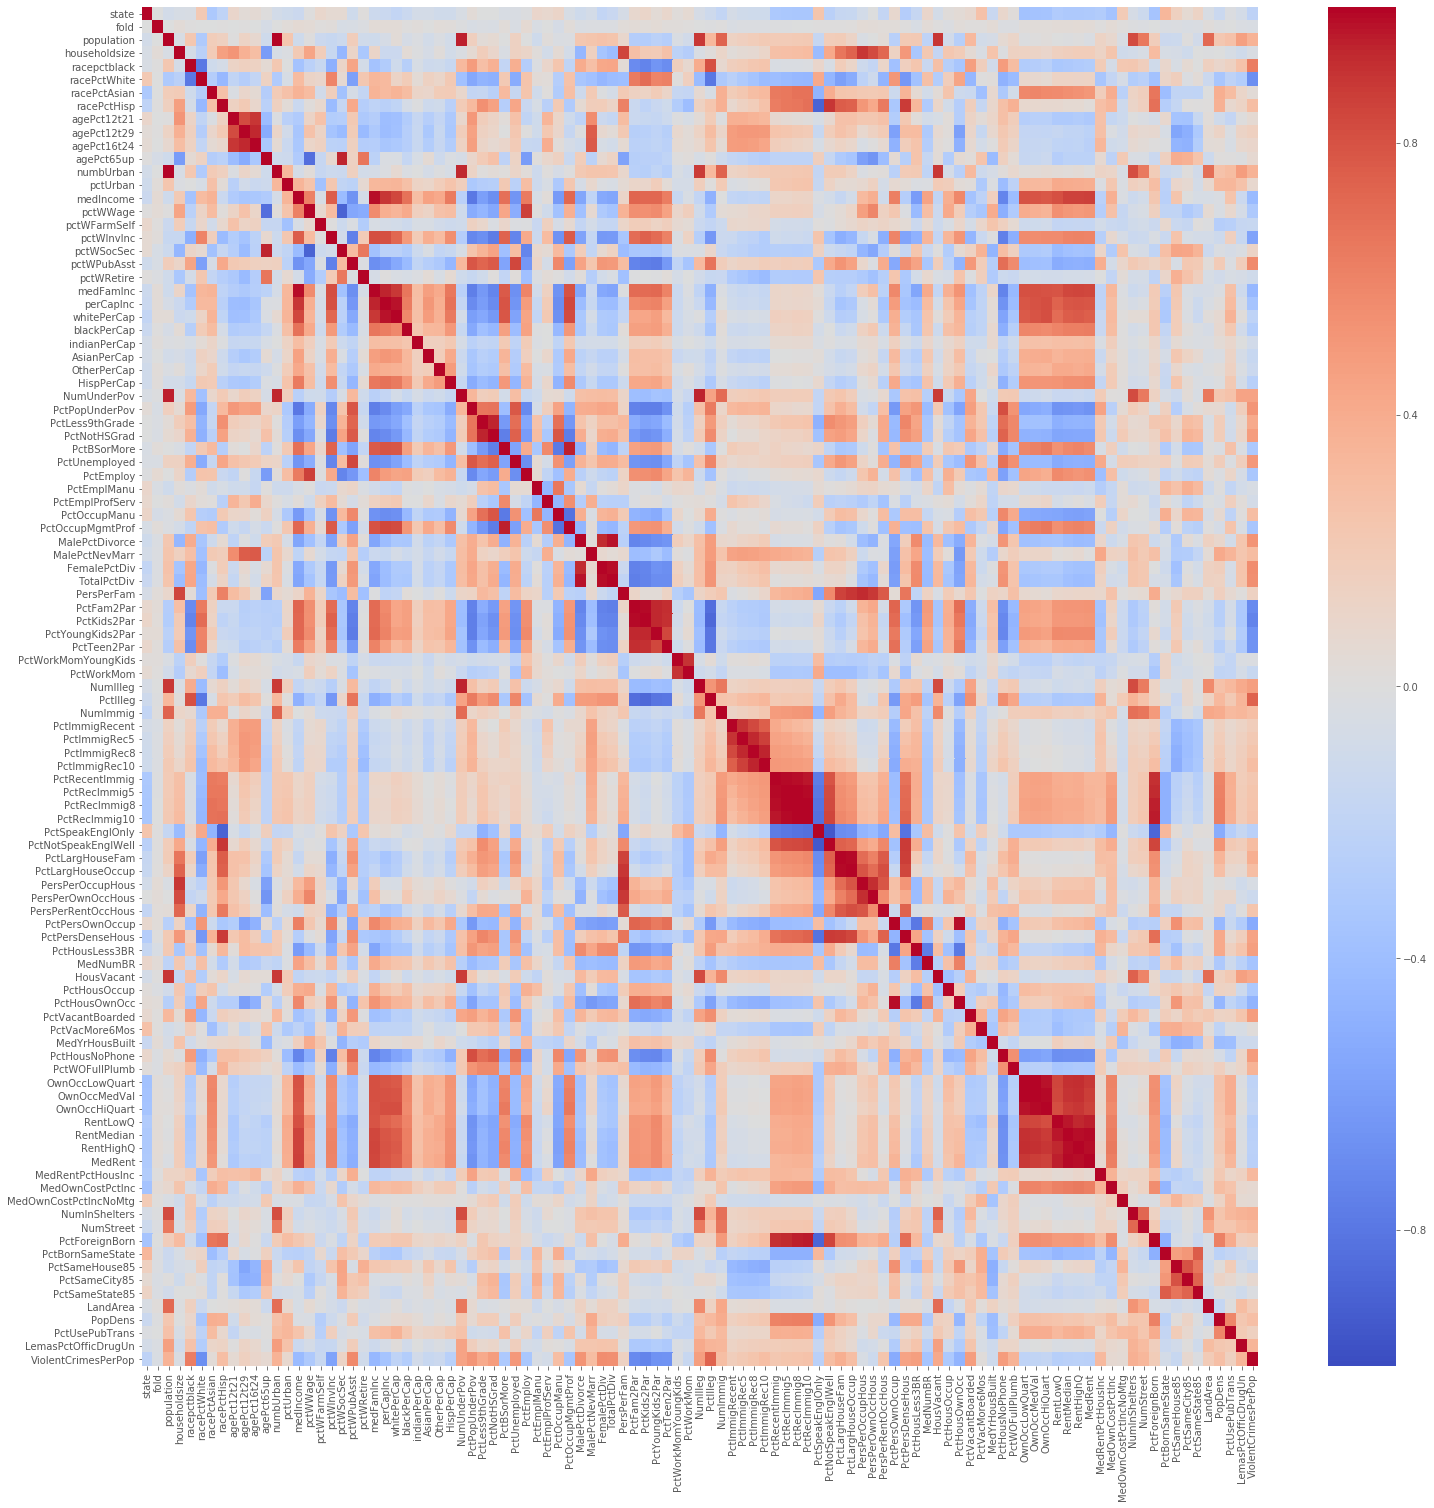

In [221]:
fig, ax = plt.subplots(figsize=(25,25))  
sns.heatmap(X.corr(), vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', ax=ax)

'ViolentCrimesPerPop'

In [269]:
corr_y = X.corr()['ViolentCrimesPerPop'].abs()
corr_y.name = 'pearson_corr'
corr_y[corr_y >= 0.5].sort_values()

PctUnemployed          0.504235
PctPopUnderPov         0.521877
MalePctDivorce         0.525407
PctPersOwnOccup        0.525491
TotalPctDiv            0.552777
FemalePctDiv           0.556032
pctWPubAsst            0.574665
pctWInvInc             0.576324
racepctblack           0.631264
PctTeen2Par            0.661582
PctYoungKids2Par       0.666059
racePctWhite           0.684770
PctFam2Par             0.706667
PctIlleg               0.737957
PctKids2Par            0.738424
ViolentCrimesPerPop    1.000000
Name: pearson_corr, dtype: float64

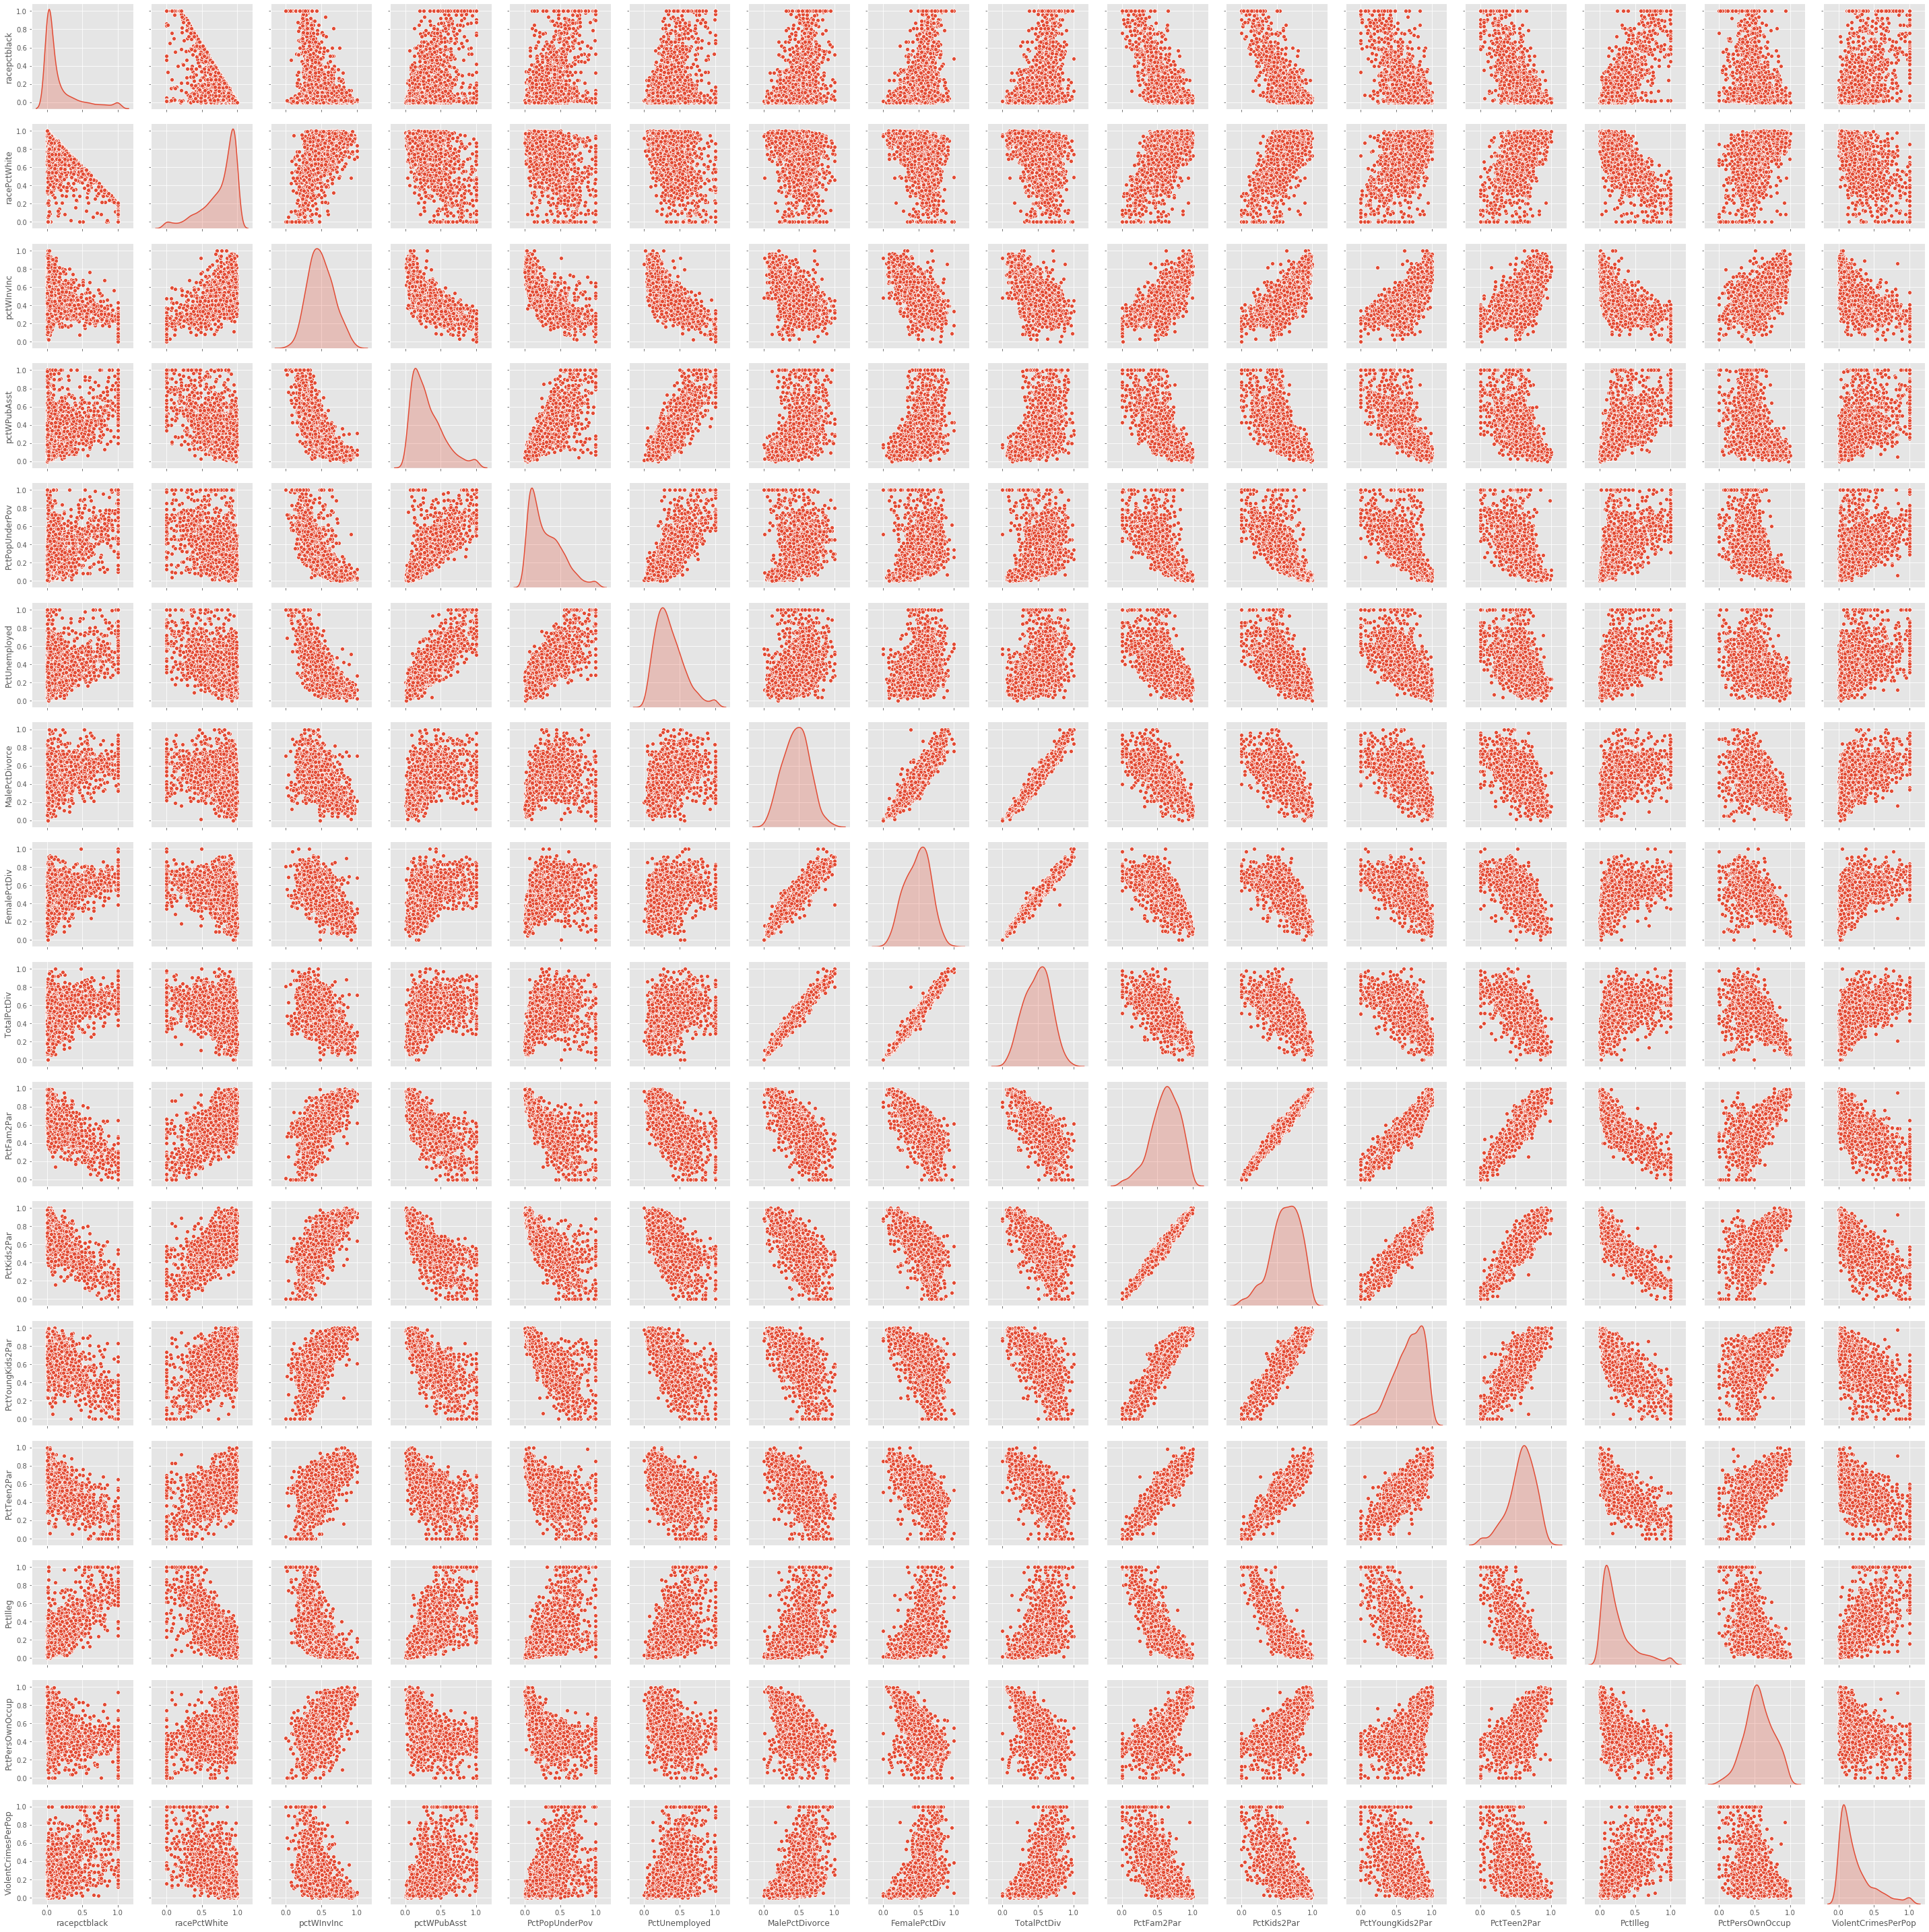

In [231]:
cols = corr_y[corr_y >= 0.5].index.to_list()
sns.pairplot(comm_crime[cols], diag_kind="kde", diag_kws=dict(shade=True, bw=.05, vertical=False))

In [232]:
corr_y

state                  0.211398
fold                   0.032577
population             0.367157
householdsize          0.034923
racepctblack           0.631264
                         ...   
LandArea               0.196800
PopDens                0.281390
PctUsePubTrans         0.153829
LemasPctOfficDrugUn    0.348627
ViolentCrimesPerPop    1.000000
Name: ViolentCrimesPerPop, Length: 103, dtype: float64

In [278]:
dcorr_y = pd.DataFrame(pairwise_distances(X.T, metric='correlation'), columns=X.columns.to_list(), index=X.columns.to_list())['ViolentCrimesPerPop']
dcorr_y.name = 'distance_corr'

In [248]:
mine = MINE(alpha=0.6, c=15) 

In [263]:
mic = []
for col in X.columns.to_list():
    mine.compute_score(X[col].values,X['ViolentCrimesPerPop'].values)
    mic_val = mine.mic()
    mic.append(mic_val)
mic_y = pd.DataFrame(mic, index=X.columns.to_list(), columns=['MIC'])

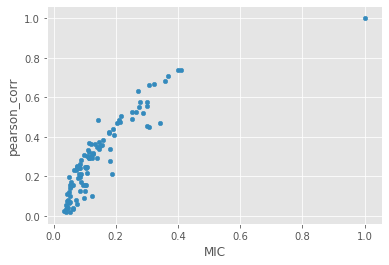

In [272]:
mic_y.join(corr_y).plot.scatter('MIC', 'pearson_corr')

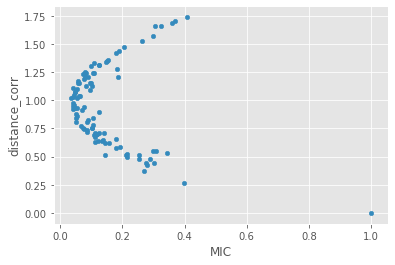

In [279]:
mic_y.join(dcorr_y).plot.scatter('MIC', 'distance_corr')

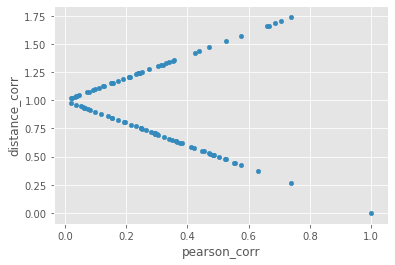

In [281]:
corr_y.to_frame().join(dcorr_y).plot.scatter('pearson_corr', 'distance_corr')

### PCA

In [233]:
from sklearn.decomposition import PCA, KernelPCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import pairwise_distances
from minepy import MINE

In [102]:
X = comm_crime.loc[:,comm_crime.dtypes!=object].iloc[:,:-1]

In [103]:
pca_commCrime = PCA(n_components=2)
principalComponents_commCrime = pca_commCrime.fit_transform(X)

In [104]:
principalComponents_commCrime

array([[ 20.67455644,  -4.49899087],
       [-24.30535355,  -4.48410155],
       [  4.67190889,  -4.50409649],
       ...,
       [ 19.68249341,   4.48110693],
       [  3.6996685 ,   4.50807026],
       [ 22.71811884,   4.49157019]])

In [105]:
PC_commCrimeDF = pd.DataFrame(data = principalComponents_commCrime, columns = ['principal component 1', 'principal component 2'])

In [106]:
print('Explained variation per principal component: {}'.format(pca_commCrime.explained_variance_ratio_))

Explained variation per principal component: [0.95684524 0.02938427]


<Figure size 432x288 with 0 Axes>

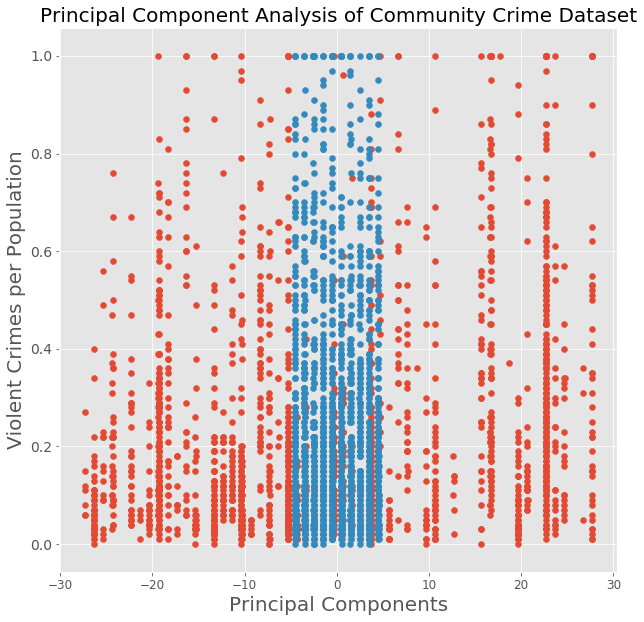

In [113]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Components',fontsize=20)
plt.ylabel('Violent Crimes per Population',fontsize=20)
plt.title("Principal Component Analysis of Community Crime Dataset",fontsize=20)
plt.scatter(PC_commCrimeDF.loc[:, 'principal component 1'], comm_crime.loc[:,'ViolentCrimesPerPop'], label='PC 1')
plt.scatter(PC_commCrimeDF.loc[:, 'principal component 2'], comm_crime.loc[:,'ViolentCrimesPerPop'], label='PC 2')
#plt.scatter(PC_commCrimeDF.loc[:, 'principal component 1'], PC_commCrimeDF.loc[:, 'principal component 2'], s = 50)
#plt.legend(targets,prop={'size': 15})

<Figure size 432x288 with 0 Axes>

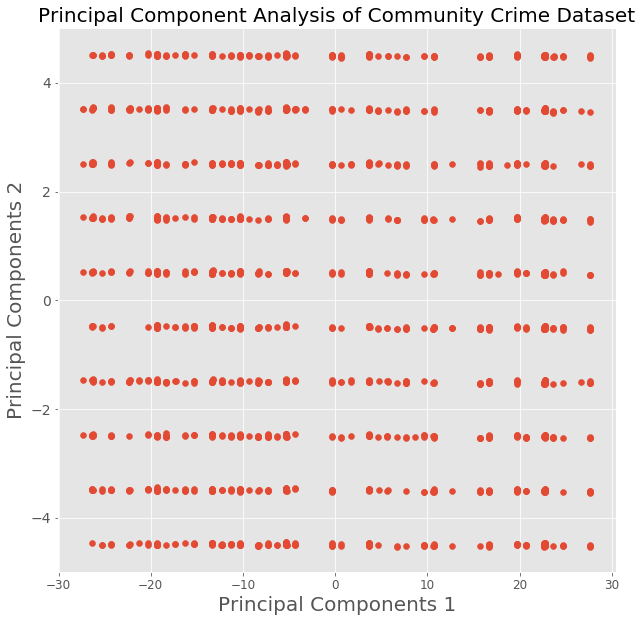

In [114]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Components 1',fontsize=20)
plt.ylabel('Principal Components 2',fontsize=20)
plt.title("Principal Component Analysis of Community Crime Dataset",fontsize=20)
plt.scatter(PC_commCrimeDF.loc[:, 'principal component 1'], PC_commCrimeDF.loc[:, 'principal component 2'], label='PC 1')

In [ ]:
scikit_kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15)
X_skernpca = scikit_kpca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_skernpca[y==0, 0], X_skernpca[y==0, 1], color='red', alpha=0.5)
plt.scatter(X_skernpca[y==1, 0], X_skernpca[y==1, 1], color='blue', alpha=0.5)

plt.text(-0.48, 0.35, 'gamma = 15', fontsize=12)
plt.title('First 2 principal components after RBF Kernel PCA via scikit-learn')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [171]:
kpca_commCrime = KernelPCA(n_components=2, kernel='poly', gamma=15)
KPC_commCrime = kpca_commCrime.fit_transform(X)

In [172]:
KPC_commCrimeDF = pd.DataFrame(data = KPC_commCrime, columns = ['kernel principal component 1', 'kernel principal component 2'])

<Figure size 432x288 with 0 Axes>

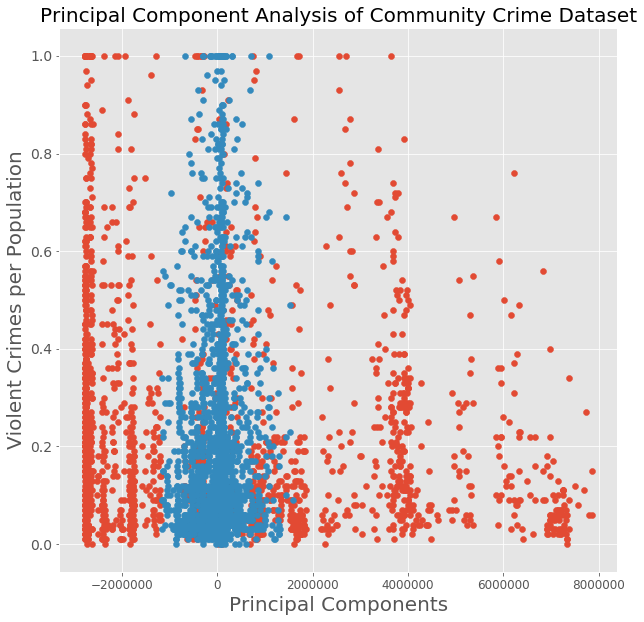

In [173]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Components',fontsize=20)
plt.ylabel('Violent Crimes per Population',fontsize=20)
plt.title("Principal Component Analysis of Community Crime Dataset",fontsize=20)
plt.scatter(KPC_commCrimeDF.loc[:, 'kernel principal component 1'], comm_crime.loc[:,'ViolentCrimesPerPop'], label='PC 1')
plt.scatter(KPC_commCrimeDF.loc[:, 'kernel principal component 2'], comm_crime.loc[:,'ViolentCrimesPerPop'], label='PC 2')
#plt.xlim(-0.00074, -0.00072)
#plt.scatter(PC_commCrimeDF.loc[:, 'principal component 1'], PC_commCrimeDF.loc[:, 'principal component 2'], s = 50)
#plt.legend(targets,prop={'size': 15})

<Figure size 432x288 with 0 Axes>

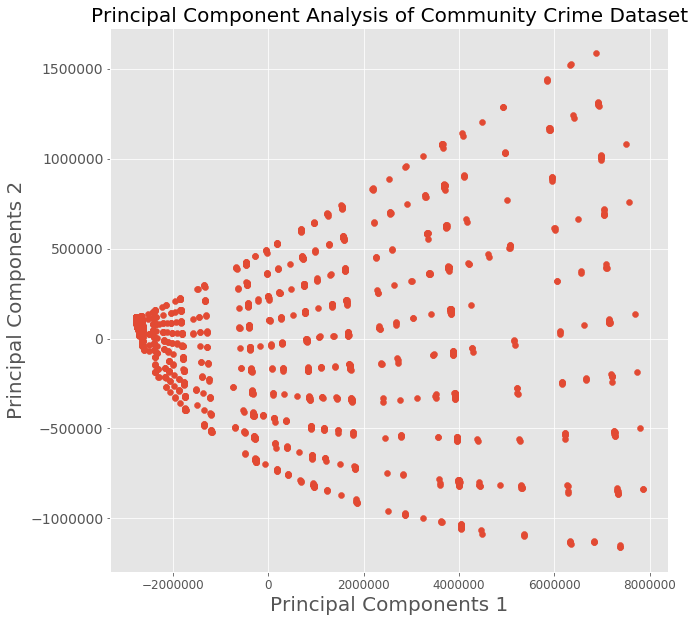

In [174]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Components 1',fontsize=20)
plt.ylabel('Principal Components 2',fontsize=20)
plt.title("Principal Component Analysis of Community Crime Dataset",fontsize=20)
plt.scatter(KPC_commCrimeDF.loc[:, 'kernel principal component 1'], KPC_commCrimeDF.loc[:, 'kernel principal component 2'])

In [122]:
y = comm_crime[['ViolentCrimesPerPop']]

In [123]:
pca = PCA()

In [124]:
X_reduced = pca.fit_transform(X)

In [131]:
kf_10 = KFold(n_splits=10, shuffle=True, random_state=2)

regr = LinearRegression()
mse = []

In [135]:
score = -1*cross_val_score(regr, np.ones((n,1)), y.values.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()  
mse.append(score) 

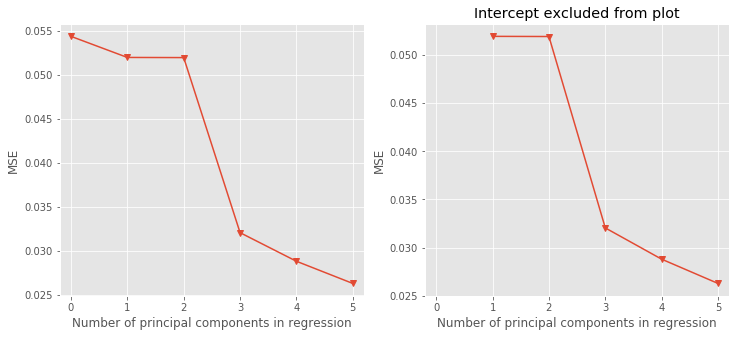

In [136]:
for i in np.arange(1,6):
    score = -1*cross_val_score(regr, X_reduced[:,:i], y.values.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
ax1.plot(mse, '-v')
ax2.plot([1,2,3,4,5], mse[1:6], '-v')
ax2.set_title('Intercept excluded from plot')

for ax in fig.axes:
    ax.set_xlabel('Number of principal components in regression')
    ax.set_ylabel('MSE')
    ax.set_xlim((-0.2,5.2))

(-0.2, 5.2)

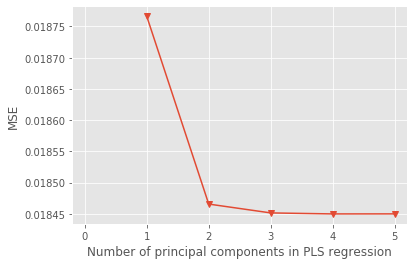

In [138]:
mse = []

kf_10 = KFold(n_splits=10, shuffle=True, random_state=2)

for i in np.arange(1, 6):
    pls = PLSRegression(n_components=i)
    pls.fit(X_reduced,y)
    score = cross_val_score(pls, X_reduced, y, cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(-score)

plt.plot(np.arange(1, 6), np.array(mse), '-v')
plt.xlabel('Number of principal components in PLS regression')
plt.ylabel('MSE')
plt.xlim((-0.2, 5.2))

In [205]:
kpca = KernelPCA(kernel='rbf', gamma=10)

In [206]:
X_reduced = kpca.fit_transform(X)

In [207]:
kf_10 = KFold(n_splits=10, shuffle=True, random_state=2)

regr = LinearRegression()
mse = []

In [208]:
score = -1*cross_val_score(regr, np.ones((n,1)), y.values.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()  
mse.append(score) 

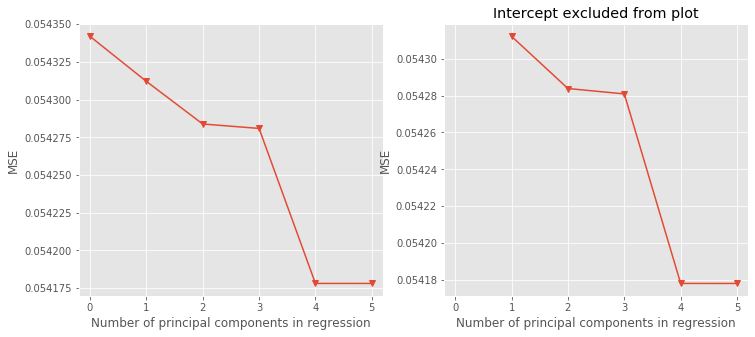

In [209]:
for i in np.arange(1,6):
    score = -1*cross_val_score(regr, X_reduced[:,:i], y.values.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
ax1.plot(mse, '-v')
ax2.plot([1,2,3,4,5], mse[1:6], '-v')
ax2.set_title('Intercept excluded from plot')

for ax in fig.axes:
    ax.set_xlabel('Number of principal components in regression')
    ax.set_ylabel('MSE')
    ax.set_xlim((-0.2,5.2))